<h1> Naive Bayes Model on Kaggle Clement Fake News Dataset </h1>
<h3> The fake news dataset is publicly available <a href="https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset">here</a></h3>

In [1]:
import util
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import naive_bayes as nb

In [2]:
folder_path = '../../datasets/kaggle_clement/split_files/'
train_file = 'train.csv'
test_file = 'test.csv'

train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

<h2> Base Model with Term Frequency</h2>

In [3]:
base_model = nb.BaseNaiveBayesModel(ngram=(1,2))
base_model.fit(train_X, train_Y)

Pipeline(steps=[('features',
                 CountVectorizer(ngram_range=(1, 2),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
       

In [4]:
pred_Y = base_model.predict(test_X)
util.print_accuracy_measures(test_Y, pred_Y, label="naive_bayes_big_base_clement")

Accuracy of naive_bayes_big_base_clement Classifier: 97.43%
CLassification Report of naive_bayes_big_base_clement Classifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3505
           1       0.97      0.97      0.97      3230

    accuracy                           0.97      6735
   macro avg       0.97      0.97      0.97      6735
weighted avg       0.97      0.97      0.97      6735



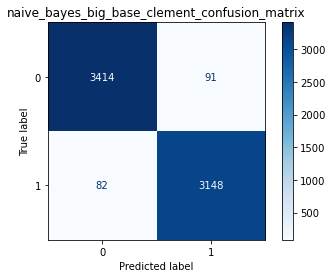

In [5]:
util.visualize_confusion_matrix(base_model,test_X, test_Y,"naive_bayes_big_base_clement_confusion_matrix")

In [6]:
base_cv_results = cross_validate(base_model, train_X, train_Y, cv=KFold(5))
util.plot_cv_score(base_cv_results,title="naive_bayes_big_base_clement_cv_score_bar")

KeyboardInterrupt: 

In [ ]:
util.plot_learning_curve(base_model, "naive_bayes_big_base_clement_learning_curve", train_X,train_Y, cv=KFold(5), n_jobs=4)

In [ ]:
util.plot_word_cloud(base_model,"naive_bayes_big_base_clement_word_cloud")

<h2> Adding TFIDF </h2>

In [ ]:
tfidf_model = nb.TFIDFNaiveBayesModel(ngram=(1,2))
tfidf_model.fit(train_X, train_Y)

In [ ]:
pred_Y = tfidf_model.predict(test_X)
util.print_accuracy_measures(test_Y, pred_Y, label="naive_bayes_big_tfidf_clement")

In [ ]:
util.visualize_confusion_matrix(base_model,test_X, test_Y,"naive_bayes_big_tfidf_clement_confusion_matrix")

In [ ]:
tfidf_cv_results = cross_validate(base_model, train_X, train_Y, cv=KFold(5))
util.plot_cv_score(base_cv_results,title="naive_bayes_big_tfidf_clement_cv_score_bar")

In [ ]:
util.plot_learning_curve(base_model, "naive_bayes_big_tfidf_clement_learning_curve", train_X,train_Y, cv=KFold(5), n_jobs=4)

In [ ]:
util.plot_word_cloud(tfidf_model,"naive_bayes_big_tfidf_clement_word_cloud")